# Binary Cross-Entropy Loss
- BCE loss 常用于二分类问题，比如判断一张图是不是猫，一封邮件是否是垃圾邮件
- BCE的数学公式定义为：对于样本 $(x, y)$，其中 $y \in \{0, 1\}$， 模型的预测概率为 $\hat{y} \in (0,1)$， 那么BCE Loss为：
  - $$\mathrm{BCE}(y, \hat{y}) = -\left( y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right)$$

## 🧠 为什么 Binary Cross Entropy 是这样定义的？

我们正在做 **二分类问题**，例如判断一张图是不是猫：

- 真实标签 $y \in \{0, 1\}$
    - $y = 1$：是猫
    - $y = 0$：不是猫

- 模型预测的是概率 $\hat{y} \in (0, 1)$
    - 表示预测为“是猫”的概率

---

### 🔍 第一步：样本的概率表达

对于每个样本，我们希望模型预测的概率尽量接近真实标签：

$$
P(y \mid \hat{y}) =
\begin{cases}
\hat{y}, & \text{if } y = 1 \\
1 - \hat{y}, & \text{if } y = 0
\end{cases}
$$

---

### ✨ 第二步：写成统一的表达式

我们可以把上面两个条件统一写成：

$$
P(y \mid \hat{y}) = \hat{y}^y \cdot (1 - \hat{y})^{1 - y}
$$

- 如果 $y = 1$：得到 $\hat{y}$
- 如果 $y = 0$：得到 $1 - \hat{y}$

---

### 💣 第三步：最大化这个概率（最大似然）

我们希望模型输出的概率 $P(y \mid \hat{y})$ 尽量大（最大似然）：

但我们不直接最大化它，而是 **最小化它的负对数**（更稳定、更易优化）：

$$
\mathcal{L} = -\log\left( \hat{y}^y \cdot (1 - \hat{y})^{1 - y} \right)
$$

---

### 🧮 第四步：展开对数

根据对数恒等式 $\log(ab) = \log a + \log b$，可得：

$$
\mathcal{L} = - \left( y \log \hat{y} + (1 - y) \log(1 - \hat{y}) \right)
$$

---

### ✅ 最终公式：Binary Cross Entropy

$$
\mathrm{BCE}(y, \hat{y}) = - \left( y \log \hat{y} + (1 - y) \log(1 - \hat{y}) \right)
$$

---

### 📌 意义分析：

- 如果 $y = 1$：损失是 $-\log(\hat{y})$，希望模型预测越接近 1 越好
- 如果 $y = 0$：损失是 $-\log(1 - \hat{y})$，希望模型预测越接近 0 越好

---

### 🧠 小结：

| 步骤 | 内容 | 表达式 |
|------|------|--------|
| 1️⃣ | 样本概率 | $\hat{y}^y (1 - \hat{y})^{1 - y}$ |
| 2️⃣ | 最大似然 | $\max P(y \mid \hat{y})$ |
| 3️⃣ | 转化为最小化损失 | $-\log P(y \mid \hat{y})$ |
| 4️⃣ | 得到 BCE | $-[y \log \hat{y} + (1 - y) \log(1 - \hat{y})]$ |


In [1]:
# coding BCE loss with numpy
import numpy as np
def BCE_loss(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    epsilon = 1e-15
    y_pred = np.clip(y_pred, a_min= epsilon, a_max=1-epsilon)

    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1  - y_pred))
    return loss

### 用PyTorch原生实现BCE Loss

In [2]:
# 需要注意的一点是，PyTorch的BCE loss必须接受的是sigmoid之后的概率，模型输出的是logits，sigmoid把logits转化为[0,1]之间的概率
import torch
import torch.nn as nn

y_true= torch.tensor([1.0, 0.0, 1.0])
y_pred = torch.tensor([0.9, 0.2, 0.7])
criterion = nn.BCELoss()
loss = criterion(y_pred, y_true)
print(f'Loss is: {loss.item():.4f}') # .item() 是 PyTorch 中张量（torch.Tensor）的一个专属方法， 从标量张量（即只包含一个数的 tensor）中，取出那个 Python 原生数字（float 或 int）

# 如果我们使用的是nn.BCEWithLogitsLoss()，那么会直接把模型输出的logits转化为[0, 1]之间的概率

Loss is: 0.2284


### BCEWithLogitsLoss()
- 首先，BCEWithLogtisLoss指的是带有 logits 的二元交叉熵损失函数
- 什么是Logits？
    - “logits” 指的是模型输出的未经 sigmoid 转换的值
    - 你不能直接理解为概率，它可能是：负数、正数
    - 而把 logits 经过 sigmoid，才变成概率
- BCEWithLogitsLoss() = sigmoid + BCELoss
- 数值更加稳定

### 让我们用BCEWithLogitsLoss来实战一个小项目吧

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# set seed
torch.manual_seed(42)

#模拟数据，创建1000个Samples，每个Sample20个features
X = torch.randn(1000, 20)

# 创建虚拟的标签,每个Sample有20个features，所以weights的形状应该是(20, 1)
true_weights = torch.randn(20, 1)
logits = torch.matmul(X, true_weights) + 0.5 * torch.randn(1000, 1)
y = (torch.sigmoid(logits) > 0.5).float().squeeze(1)

# 构造数据集
dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

### 定义和初始化模型

In [8]:
class MLPBinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(20, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.net(x)

# 初始化模型
model = MLPBinaryClassifier()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
    

Epoch 1/20 | Average Loss: 0.3771114901304245
Epoch 2/20 | Average Loss: 0.1785592926181853
Epoch 3/20 | Average Loss: 0.12186101683974267
Epoch 4/20 | Average Loss: 0.11625929532945156
Epoch 5/20 | Average Loss: 0.10553942361474038
Epoch 6/20 | Average Loss: 0.07541870722919702
Epoch 7/20 | Average Loss: 0.09169523367285728
Epoch 8/20 | Average Loss: 0.08234181106742472
Epoch 9/20 | Average Loss: 0.06070415324531495
Epoch 10/20 | Average Loss: 0.08047227892279625
Epoch 11/20 | Average Loss: 0.08207003509998322
Epoch 12/20 | Average Loss: 0.08195666119456291
Epoch 13/20 | Average Loss: 0.06152057254314423
Epoch 14/20 | Average Loss: 0.048931623123586176
Epoch 15/20 | Average Loss: 0.06297948902100324
Epoch 16/20 | Average Loss: 0.06662567184865474
Epoch 17/20 | Average Loss: 0.050685908898711204
Epoch 18/20 | Average Loss: 0.06950504911644384
Epoch 19/20 | Average Loss: 0.05299163167364895
Epoch 20/20 | Average Loss: 0.05127598014473915


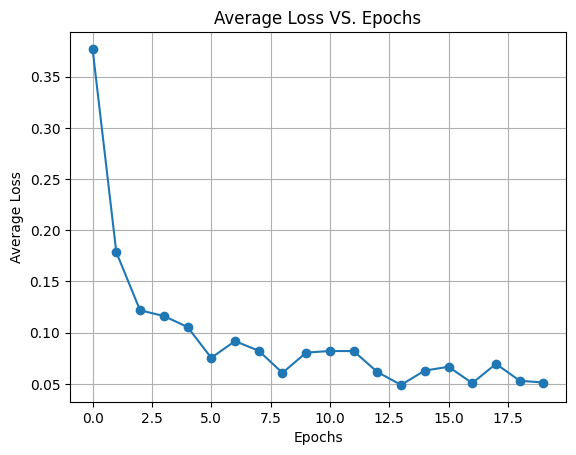

In [9]:
import matplotlib.pyplot as plt

def train_model(num_epochs, model, loader, criterion):
    loss_history = []
    for epoch in range(num_epochs):
        model.train()
        epoch_loss= 0.0
        for batch_x, batch_y in loader:
            optimizer.zero_grad()
            logits = model(batch_x).squeeze(1)
            loss = criterion(logits, batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * batch_x.size(0)
        average_loss = epoch_loss / len(loader.dataset)
        loss_history.append(average_loss)
        print(f'Epoch {epoch + 1}/{num_epochs} | Average Loss: {average_loss}')
    return loss_history

def plot_loss_curve(loss_history):
    plt.plot(loss_history, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Average Loss')
    plt.title('Average Loss VS. Epochs')
    plt.grid(True)
    plt.show()

loss_history = train_model(num_epochs=20, model=model, loader=loader, criterion=criterion)
plot_loss_curve(loss_history)

In [ ]:
# Eval模型
model.eval()
with torch.inference_mode():
    logits = model(X)
    prob = torch.sigmoid(logits)
    pred = (prob > 0.5).float().squeeze()
    accuracy = (pred == y.squeeze()).float().mean()
    print(f'Model accuracy is: {accuracy.item() * 100:.2f}%')

Model accuracy is: 99.60%


: 